In [146]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.special import gammainc as igamc
from scipy.stats import norm
import statsmodels
from statsmodels.tsa.stattools import adfuller


with open("dump.txt") as file:
    lines = file.readlines()

text = lines[0]
for i in lines[1:]:
    text += i

text = ''.join(text.split())
print(text)
  
arr = np.array(list(text))
arr = arr.astype(np.int)


[chr(int(text[i:i+8], 2)) for i in range(int(len(text)/8))]

1011011010110000110011001001101111110101101010010110010100000111100100101001111101111010001011011001100110110111010001101110110110011000000110010010100000010101101110111101100101011101101000010011111110000001100111111101101111010001001100110100100100011001001111100011110001011011011010010101011000101000111010100011110100001011110010011001110000010111100001011100111100110100010100011010001000010010000010011001101111001110110110100110110111100111010111011001010111101101110101110001111100011111110000111110111111010101000110011000101000001001110010111110010101101001101001101000110111010111010110101111010011100101000101101110010011010110001011010001100011100001001110100111111110001100110001001001011000100001110001110111011100011100010111010111100100000011110111101110101011101101010010010101001010101100101011100010011100110001010100101010110100100000000001011001001010011011001001010011111011111001000011101010101010000000100011000001110010100110010111100000010111000111011011100010100100101011

['¶',
 'm',
 'Ú',
 'µ',
 'k',
 'Ö',
 '¬',
 'X',
 '°',
 'a',
 'Ã',
 '\x86',
 '\x0c',
 '\x19',
 '3',
 'f',
 'Ì',
 '\x99',
 '2',
 'd',
 'É',
 '\x93',
 '&',
 'M',
 '\x9b',
 '7',
 'o',
 'ß',
 '¿',
 '~',
 'ý',
 'ú',
 'õ',
 'ë',
 'Ö',
 '\xad',
 'Z',
 'µ',
 'j',
 'Ô',
 '©',
 'R',
 '¥',
 'K',
 '\x96',
 ',',
 'Y',
 '²',
 'e',
 'Ê',
 '\x94',
 '(',
 'P',
 '\xa0',
 'A',
 '\x83',
 '\x07',
 '\x0f',
 '\x1e',
 '<',
 'y',
 'ò',
 'ä',
 'É',
 '\x92',
 '%',
 'J',
 '\x94',
 ')',
 'S',
 '§',
 'O',
 '\x9f',
 '>',
 '}',
 'û',
 '÷',
 'ï',
 'Þ',
 '½',
 'z',
 'ô',
 'è',
 'Ñ',
 '¢',
 'E',
 '\x8b',
 '\x16',
 '-',
 '[',
 '¶',
 'l',
 'Ù',
 '³',
 'f',
 'Ì',
 '\x99',
 '3',
 'f',
 'Í',
 '\x9b',
 '6',
 'm',
 'Û',
 '·',
 'n',
 'Ý',
 'º',
 't',
 'è',
 'Ñ',
 '£',
 'F',
 '\x8d',
 '\x1b',
 '7',
 'n',
 'Ý',
 '»',
 'v',
 'í',
 'Û',
 '¶',
 'l',
 'Ù',
 '³',
 'f',
 'Ì',
 '\x98',
 '0',
 '`',
 'À',
 '\x81',
 '\x03',
 '\x06',
 '\x0c',
 '\x19',
 '2',
 'd',
 'É',
 '\x92',
 '%',
 'J',
 '\x94',
 '(',
 'P',
 '\xa0',
 '@',
 '\x81',
 '\x02'

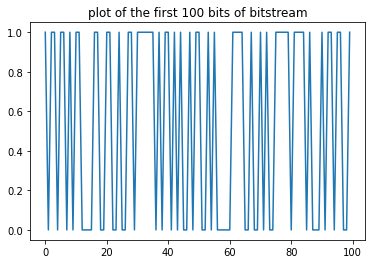

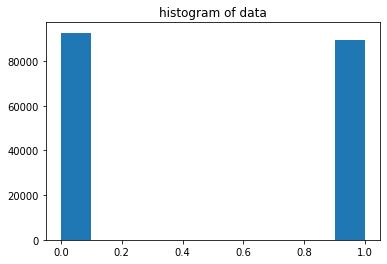

In [131]:
plt.plot(arr[:100])
plt.title("plot of the first 100 bits of bitstream")
plt.show()
plt.hist(arr)
plt.title("histogram of data")
plt.show()

In [132]:
def monobit(string):
    S = 0
    for i in string:
        if i == '0':
            S -= 1
        elif i == '1':
            S += 1
        else:
            print("something is wrong with your binary data. Sanitize it first!")
            break
    sobs = abs(S)/math.sqrt(len(string))
    pval = math.erfc(sobs)
    return S, sobs, pval

def blockfreq(text, M):
    if M>= len(text):
        print("M is too large")
        return
    lines = [text[i:i+M] for i in range(0, len(text), M)]
    if len(lines[-1]) != len(lines[0]):
        lines = lines[:-1]
    pis = np.array([i.count('1')/M for i in lines])
    squaresum = np.sum(np.square(pis - 0.5))
    chisq = 4*M*squaresum
    pval = igamc(pis.shape[0]/2, chisq/2)
    return chisq, pval

def runstest(text):
    n = len(text)
    tau = 2/math.sqrt(n)
    zeros = text.count('0')
    pi = zeros/n
    if abs(pi-0.5) >= tau:
        print("sample is too biased for the runs test")
        return "n/a, test not run", 0
    vobs = 1
    for i in range(n-1):
        if text[i] != text[i+1]:
            vobs += 1

    temp = abs(vobs - 2*n*pi*(1-pi))
    temp2 =2*math.sqrt(2*n)*pi*(1-pi)
    pval = math.erfc(temp/temp2)
    return vobs, pval

def run(text):
    #python runs calculator from https://www.geeksforgeeks.org/python-longest-run-of-given-character-in-string/
    # initializing K    
    K = '1'
    # Longest Run of Character in String 
    # Using loop 
    res = 0
    cnt = 0
    for chr in text: 
        if chr == K: 
            cnt += 1
        else: 
            res = max(res, cnt) 
            cnt = 0
    res = max(res, cnt)
    return res
    
def longestrun(text, M=128):
    lines = [text[i:i+M] for i in range(0, len(text), M)]
    if len(lines[-1]) != len(lines[0]):
        lines = lines[:-1]
    #assuming we use M=128, which most students should, use this array:
    prob128 = np.array([0.1174, 0.2430, 0.2493, 0.1752, 0.1027, 0.1124])
    freq = np.zeros(6)
    for block in lines:
        num = run(block)
        if num >= 4: freq[0]+=1       
        if num == 5: freq[1]+=1  
        if num == 6: freq[2]+=1  
        if num == 7: freq[3]+=1  
        if num == 8: freq[4]+=1  
        if num >= 9: freq[5]+=1  
    chisq = np.sum(np.square(freq-49*prob128)/49*prob128)
    pval = igamc(5/2, chisq/2)
    return chisq, pval

def rankMat(A):
    #Used to calculate the rank of a matrix over a galois field of 2
    #taken from https://gist.github.com/StuartGordonReid/eb59113cb29e529b8105
    A = A.tolist()
    n=len(A[0])
    rank = 0
    for col in range(n):
        j=0
        rows = []
        while j<len(A):
            if A[j][col] == 1:
                rows += [j]
            j+=1
        if len(rows) >= 1:
            for c in range(1,len(rows)):
                for k in range(n):
                    A[rows[c]][k] = (A[rows[c]][k] + A[rows[0]][k])%2
            A.pop(rows[0])
            rank += 1
    for row in A:
        if sum(row)>0:
            rank += 1
    return rank

def matrixtest(text, M=32, Q=32):
    sequence = list(text)
    size = M*Q
    lines = [sequence[i:i+size] for i in range(0, len(sequence), size)]
    if len(lines[-1]) != len(lines[0]):
        lines = lines[:-1]
    N = len(lines)
    numranks = np.zeros(3)
    probarr = np.array([0.2888, 0.5776, 0.1336])
    for line in lines:
        matrix = np.array(line)
        matrix = matrix.reshape((M, Q))
        matrix = matrix.astype(np.int)
        rank = rankMat(matrix)
        if rank == M: numranks[0] += 1       
        elif rank == M-1: numranks[1] += 1         
        else: numranks[2] += 1
    chisq = np.sum(np.square(numranks-N*probarr)/N*probarr)
    pval =  igamc(1,chisq/2)
    return chisq, pval
            
def dtfttest(text):
    n = len(text)
    data = list(text)
    for i in range(n):
        data[i] = int(data[i])
        if data[i] == 0: data[i] = -1
    data = np.array(data)
    S = np.fft.fft(data)
    M = np.abs(S[:int(S.shape[0]/2)])
    T = math.sqrt(math.log(1/0.05)*n)
    N0 = .95*len(text)/2
    N1 = 0
    for i in M:
        if i < T: N1 += 1
    d = (N1 - N0)/math.sqrt(n*0.95*0.05/4)
    pval = math.erfc(abs(d)/math.sqrt(2))
    return d, pval

def randomwalk(text):
    n = len(text)
    data = list(text)
    for i in range(n):
        data[i] = int(data[i])
        if data[i] == 0: data[i] = -1
    data = np.array(data)
    walk = np.zeros(data.shape)
    walk[0] = data[0]
    for i in range(1, walk.shape[0]):
        walk[i] = walk[i-1]+data[i]
    plt.plot(walk)
    plt.title("random walk using data")
    plt.show()
    return
    
def dftest(text):
    n = len(text)
    data = list(text)
    for i in range(n):
        data[i] = int(data[i])
        if data[i] == 0: data[i] = -1
    data = np.array(data)
    walk = np.zeros(data.shape)
    walk[0] = data[0]
    for i in range(1, walk.shape[0]):
        walk[i] = walk[i-1]+data[i]
    result = adfuller(walk)
    #returns (ADF statistic, p-value)
    return result[0], result[1]

def spec(text):
    n = len(text)
    data = list(text)
    for i in range(n):
        data[i] = int(data[i])
        if data[i] == 0: data[i] = -1
    data = np.array(data)
    S = np.fft.fft(data)
    power = np.abs(S) ** 2
    plt.plot(power[:int(n/2)])
    plt.title("power spectrum")
    plt.show()
    return



number of bits:
182160


calculating entropy
p = 0.5087176108915239
entropy: 0.9997807086500758


calculating NIST monobit test
S: -3176
square root of n: 426.80206185068977
Sobs: 7.44138860582889
p-value: 6.717334642336478e-26
monobit randomness test failed due to p-value being too small!


calculating NIST Block Frequency Test
chi-squared value: 122.34000000000012
p-value: 0.9841404116148839
block frequency test passed!


calculating NIST runs test
sample is too biased for the runs test
Vobs: n/a, test not run
p-value: 0
runs test failed due to p-value being too small!


calculating NIST longest runs test
chi-squared value: 6086.792485301284
p-value: 1.0
longest runs test passed!


calculating NIST binary matrix rank test
chi-squared value: 0.456541059523254
p-value: 0.2040910863406969
binary matrix rank test passed!


calculating NIST dtft spectral test
d: -0.15050631481304658
p-value: 0.8803651689878326
dtft spectral test passed!


skipping NIST template matching test (difficult t

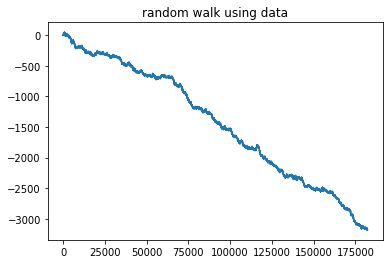

ADF value: 1.102313820021241
p-value: 0.9952363217734833
ADF test failed due to the existence of a unit root!


In [133]:
print("\nnumber of bits:")
print(len(text))


print("\n\ncalculating entropy")
p = text.count('0')/len(text)
print("p =", p)
print("entropy:", -p*math.log2(p)-(1-p)*math.log2(1-p))

print("\n\ncalculating NIST monobit test")
S, sobs, pval = monobit(text)
print("S:",S)
print("square root of n:", math.sqrt(len(text)))
print("Sobs:", sobs)
print("p-value:", pval)
if pval <= 0.01:
    print("monobit randomness test failed due to p-value being too small!")
else:
    print("monobit randomness test passed!")

    
print("\n\ncalculating NIST Block Frequency Test")

chisq, pval = blockfreq(text, 2000)    
print("chi-squared value:", chisq)
print("p-value:", pval)
if pval <= 0.01:
    print("block frequency test failed due to p-value being too small!")
else:
    print("block frequency test passed!")
    

print("\n\ncalculating NIST runs test")
vobs, pval = runstest(text)
print("Vobs:", vobs)
print("p-value:", pval)
if pval <= 0.01:
    print("runs test failed due to p-value being too small!")
else:
    print("runs test passed!")


print("\n\ncalculating NIST longest runs test")
chisq, pval = longestrun(text)
print("chi-squared value:", chisq)
print("p-value:", pval)
if pval <= 0.01:
    print("longest runs test failed due to p-value being too small!")
else:
    print("longest runs test passed!")
    
    
print("\n\ncalculating NIST binary matrix rank test")
chisq, pval = matrixtest(text)
print("chi-squared value:", chisq)
print("p-value:", pval)
if pval <= 0.01:
    print("binary matrix rank test failed due to p-value being too small!")
else:
    print("binary matrix rank test passed!")

    
print("\n\ncalculating NIST dtft spectral test")
d, pval = dtfttest(text)
print("d:",d)
print("p-value:", pval)
if pval <= 0.01:
    print("dtft spectral test failed due to p-value being too small!")
else:
    print("dtft spectral test passed!")
    
#I'll skip the template based tests due to not having the templates...    
print("\n\nskipping NIST template matching test (difficult to implement meaningfully)")
print("\n\nskipping NIST overlapping template matching test (difficult to implement meaningfully)")
print("\n\nskipping NIST Maurer’s “Universal Statistical” Test (difficult to implement meaningfully)")

#The algorithm is defined in a research paper. I could implement it given some time, but I want the video tutorials
#to be done before the end of Wednesday.
print("\n\nskipping NIST linear complexity test (algorithm not clearly defined in documentation)")

#These tests are very computationally expensive for large values of m. Also they're a hassle to implement.
#If you think they are important then I'll still add them
print("\n\nskipping NIST serial test \n(this tests the frequency of any given bit sequence of length m. Computationaly expensive)")
print("\n\nskipping NIST approximate entropy test \n(this calculates the entropy of blocks of size m. Computationaly expensive)")

print("\n\nvisualizing a random walk - then computing an augmented dickey-fuller test")
print("this should tell us the same thing as the NIST defined test, but it is pre-defined in the time series analysis library")
print("for large samples of data this will take a few minutes. Be patient.")
randomwalk(text)
metric, pval = dftest(text)
print("ADF value:", metric)
print("p-value:", pval)
if pval >= 0.01:
    print("ADF test failed due to the existence of a unit root!")
else:
    print("ADF test passed!")
    




skipping NIST random excursions test (difficult to implement)
instead, let's visualize the spectrum of the data


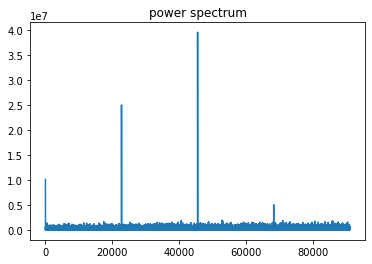

In [129]:
print("\n\nskipping NIST random excursions test (difficult to implement)")
print("instead, let's visualize the spectrum of the data")
spec(text)